In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Advanced Graphing for the Adventerous

In [ ]:
#from bokeh.plotting import figure, show
#from bokeh.embed import components
#from bokeh.models import CategoricalColorMapper, HoverTool
#import plotly.graph_objs as go

In [ ]:
#from bokeh.io import output_notebook
#output_notebook()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Metis Projects/Classification/25airportsDL2019.csv')

In [ ]:
df.head()

,Unique_Id,Carrier Code,Flight Date,Flight Number,Month,Tail Number,Origin Airport,Origin City,Origin State,Origin Divison,Origin Region,Dest Airport,Dest City,Dest State,Dest Divison,Dest Region,Scheduled Departure Time,Schedule Departure Time Name,Actual Departure Time,Actual Departure Time Name,Minutes Delayed Departing,Delayed Departure,Scheduled Elapsed Time,Actual Elapsed Time,Wheels-off Time,Taxi-out Time,Minutes Delayed By Carrier,Minutes Delayed By Weather,Minutes Delayed By NAS,Minutes Delayed By Security,Minutes Delayed By Late Arrival,Avg Min Delayed Due To Delta Yesterday,Avg Min Delayed Due To NAS Yesterday,Avg Min Delayed Due To Security Yesterday,Avg Min Delayed Due To Late Arrival Yesterday,Avg Min Delayed Due To Weather Yesterday,Total Number of Scheduled Flights,Cancelled,Diverted,Flights,Distance,Distance Name,Distance Range Name,Scheduled Arrival Time,Actual Arrival Time,Minutes Delayed Arriving,AirTime
0,01/01/2019-N67171-15-ATL,DL,2019-01-01,15,January,N67171,ATL,Atlanta,Georgia,South Atlantic,South,TPA,Tampa,Florida,South Atlantic,South,19:51,Evening,19:48,Evening,-3,0,88,80,20:01,13,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,406.0,Short Haul,90-583,21:19,2108.0,-11.0,64.0
1,01/01/2019-N354NW-31-ATL,DL,2019-01-01,31,January,N354NW,ATL,Atlanta,Georgia,South Atlantic,South,DFW,Dallas/Fort Worth,Texas,West South Central,South,19:14,Evening,19:17,Evening,3,0,148,139,19:31,14,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,731.0,Short Haul,583-1072,20:42,2036.0,-6.0,112.0
2,01/01/2019-N960DL-91-ATL,DL,2019-01-01,91,January,N960DL,ATL,Atlanta,Georgia,South Atlantic,South,RSW,Fort Myers,Florida,South Atlantic,South,17:24,Evening,17:20,Evening,-4,0,101,99,17:30,10,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,515.0,Short Haul,90-583,19:05,1859.0,-46.0,86.0
3,01/01/2019-N944AT-131-ATL,DL,2019-01-01,131,January,N944AT,ATL,Atlanta,Georgia,South Atlantic,South,GSP,Greer,South Carolina,South Atlantic,South,17:46,Evening,17:48,Evening,2,0,54,44,17:58,10,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,153.0,Short Haul,90-583,18:40,1832.0,-8.0,31.0
4,01/01/2019-N173DZ-186-ATL,DL,2019-01-01,186,January,N173DZ,ATL,Atlanta,Georgia,South Atlantic,South,MCO,Orlando,Florida,South Atlantic,South,15:55,Afternoon,15:54,Afternoon,-1,0,90,83,16:10,16,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,404.0,Short Haul,90-583,17:25,1717.0,-8.0,60.0


In [ ]:
df.columns

Index(['Unique_Id', 'Carrier Code', 'Flight Date', 'Flight Number', 'Month',
       'Tail Number', 'Origin Airport', 'Origin City', 'Origin State',
       'Origin Divison', 'Origin Region', 'Dest Airport', 'Dest City',
       'Dest State', 'Dest Divison', 'Dest Region', 'Scheduled Departure Time',
       'Schedule Departure Time Name', 'Actual Departure Time',
       'Actual Departure Time Name', 'Minutes Delayed Departing',
       'Delayed Departure', 'Scheduled Elapsed Time', 'Actual Elapsed Time',
       'Wheels-off Time', 'Taxi-out Time', 'Minutes Delayed By Carrier',
       'Minutes Delayed By Weather', 'Minutes Delayed By NAS',
       'Minutes Delayed By Security', 'Minutes Delayed By Late Arrival',
       'Avg Min Delayed Due To Delta Yesterday',
       'Avg Min Delayed Due To NAS Yesterday',
       'Avg Min Delayed Due To Security Yesterday',
       'Avg Min Delayed Due To Late Arrival Yesterday',
       'Avg Min Delayed Due To Weather Yesterday',
       'Total Number of Schedu

In [ ]:
df.shape

(704501, 47)

In [ ]:
df.describe()

,Flight Number,Minutes Delayed Departing,Delayed Departure,Scheduled Elapsed Time,Actual Elapsed Time,Taxi-out Time,Minutes Delayed By Carrier,Minutes Delayed By Weather,Minutes Delayed By NAS,Minutes Delayed By Security,Minutes Delayed By Late Arrival,Avg Min Delayed Due To Delta Yesterday,Avg Min Delayed Due To NAS Yesterday,Avg Min Delayed Due To Security Yesterday,Avg Min Delayed Due To Late Arrival Yesterday,Avg Min Delayed Due To Weather Yesterday,Total Number of Scheduled Flights,Cancelled,Diverted,Flights,Distance,Actual Arrival Time,Minutes Delayed Arriving,AirTime
count,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704501.000000,704500.000000,704501.000000,704501.000000,704501.0,704501.000000,703079.000000,703079.000000,701616.000000
mean,1740.048800,9.091659,0.150294,160.064904,152.297978,18.025820,3.632091,0.728494,3.060468,0.010633,2.948092,3.611373,3.030165,0.010767,2.900928,0.730278,3.328843,0.001947,0.002148,1.0,945.782611,1529.556708,-35.509512,127.513425
std,750.576971,44.090020,0.357359,78.128084,78.175813,9.794056,27.429235,15.664364,19.666613,1.034018,18.858401,5.604008,5.079664,0.194901,6.736050,3.051117,1.162438,0.044087,0.046293,0.0,623.326649,543.876994,339.092555,74.914275
min,6.000000,-43.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,95.000000,1.000000,-2358.000000,19.000000
25%,1149.000000,-4.000000,0.000000,102.000000,95.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030000,0.620000,0.000000,0.280000,0.000000,3.000000,0.000000,0.000000,1.0,502.000000,1133.000000,-20.000000,73.000000
50%,1760.000000,-2.000000,0.000000,138.000000,132.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000,1.540000,0.000000,0.960000,0.000000,3.000000,0.000000,0.000000,1.0,746.000000,1552.000000,-9.000000,106.000000
75%,2374.000000,5.000000,0.000000,199.000000,192.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.050000,3.480000,0.000000,2.720000,0.280000,4.000000,0.000000,0.000000,1.0,1247.000000,2002.000000,3.000000,164.000000
max,3179.000000,1266.000000,1.000000,703.000000,678.000000,182.000000,1265.000000,1167.000000,1215.000000,434.000000,1046.000000,225.940000,182.550000,20.620000,188.040000,171.620000,10.000000,1.000000,1.000000,1.0,4983.000000,2400.000000,2399.000000,651.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704501 entries, 0 to 704500
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Unique_Id                        704501 non-null  object        
 1   Carrier Code                     704501 non-null  object        
 2   Flight Date                      704501 non-null  datetime64[ns]
 3   Flight Number                    704501 non-null  int64         
 4   Tail Number                      704500 non-null  object        
 5   Origin Airport                   704501 non-null  object        
 6   Origin City                      704501 non-null  object        
 7   Origin State                     704501 non-null  object        
 8   Origin Divison                   704501 non-null  object        
 9   Origin Region                    704501 non-null  object        
 10  Dest Airport                     704501 non-

In [ ]:
df.isna().sum()

Unique_Id                                           0
Carrier Code                                        0
Flight Date                                         0
Flight Number                                       0
Month                                               0
Tail Number                                         1
Origin Airport                                      0
Origin City                                         0
Origin State                                        0
Origin Divison                                      0
Origin Region                                       0
Dest Airport                                        0
Dest City                                           0
Dest State                                          0
Dest Divison                                        0
Dest Region                                         0
Scheduled Departure Time                            0
Schedule Departure Time Name                        0
Actual Departure Time       

In [ ]:
df['Origin Airport'].unique()

array(['ATL', 'LAX', 'ORD', 'JFK', 'DEN', 'SFO', 'MCO', 'LAS', 'SEA',
       'CLT', 'MIA', 'PHX', 'IAH', 'MSP', 'FLL', 'BOS', 'DTW', 'PHL',
       'LGA', 'BWI', 'SLC', 'DCA', 'MDW'], dtype=object)

## How many delta flights are delayed departures vs non delayed departures in 2019?

In [ ]:
delayed = df['Delayed Departure'].sum()
perc_delayed = round(df['Delayed Departure'].sum()/(df['Delayed Departure']).count(),2)
print(f'Number of delayed Delta flights in 2019: {delayed}, {int(perc_delayed*100)}% were delayed')

not_delayed = 1 - delayed 
perc_not_delayed = 1 - perc_delayed
print(f'Number of not delayed Delta flights in 2019: {not_delayed}, {int(perc_not_delayed*100)}% were not delayed')

Number of delayed Delta flights in 2019: 105882, 15% were delayed
Number of not delayed Delta flights in 2019: -105881, 85% were not delayed


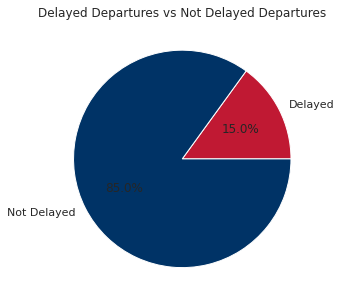

In [ ]:
plt.figure(figsize=[15,5])

plt.subplot(1,1,1)
labels='Delayed', 'Not Delayed'
mycolors = ["#C01933", "#003366"]
plt.pie([perc_delayed,perc_not_delayed], labels=labels,colors = mycolors, autopct='%1.1f%%')
plt.title('Delayed Departures vs Not Delayed Departures');

## Is a delayed arriving flight also a delayed departing flight?

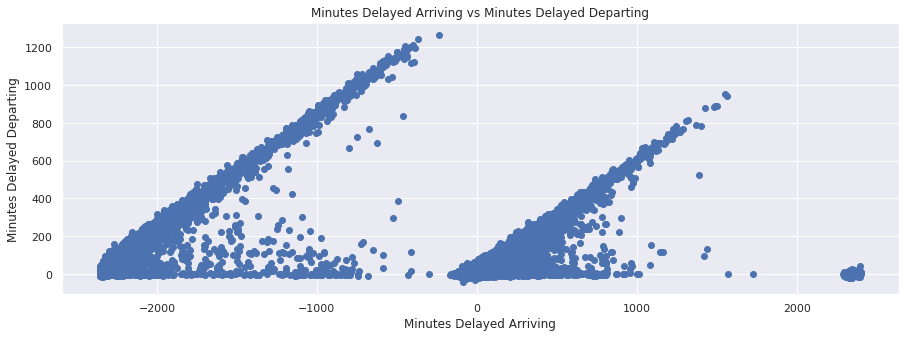

In [ ]:
plt.figure(figsize=[15,5])

plt.scatter(df['Minutes Delayed Arriving'], df['Minutes Delayed Departing'])
plt.title('Minutes Delayed Arriving vs Minutes Delayed Departing')
plt.xlabel("Minutes Delayed Arriving")
plt.ylabel("Minutes Delayed Departing");

## What are the delays by airport?

In [ ]:
delays_by_airport = df[['Origin Airport', 'Delayed Departure']].groupby(['Origin Airport']).sum().reset_index().sort_values('Delayed Departure', ascending = False)

delays_by_airport

,Origin Airport,Delayed Departure
0,ATL,35864
16,MSP,9307
6,DTW,8125
11,LAX,6564
22,SLC,5921
9,JFK,5839
12,LGA,5834
20,SEA,4304
1,BOS,3345
17,ORD,2876


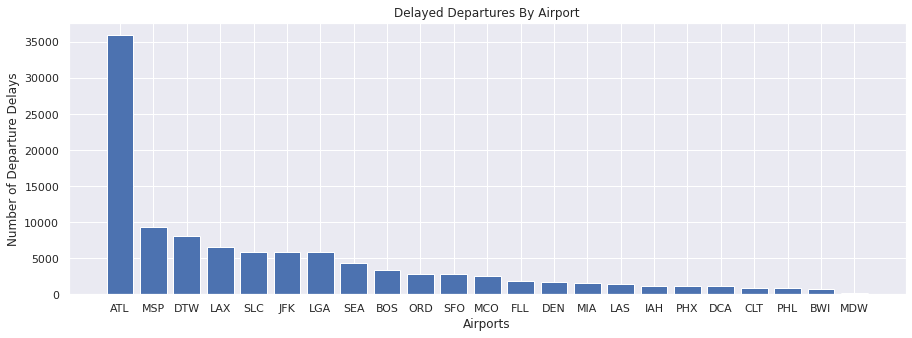

In [ ]:
plt.figure(figsize=[15,5])

plt.subplot(1,1,1)
plt.bar(delays_by_airport['Origin Airport'],delays_by_airport['Delayed Departure'])
plt.title('Delayed Departures By Airport')
plt.xlabel("Airports")
plt.ylabel("Number of Departure Delays");

In [ ]:
delay_by_airport_ratio = df[['Origin Airport', 'Delayed Departure']].groupby(['Origin Airport']).sum()/ df[['Origin Airport', 'Delayed Departure']].groupby(['Origin Airport']).count()

delay_by_airport_ratio =  delay_by_airport_ratio.reset_index()

delay_by_airport_ratio = delays_by_airport.merge(delay_by_airport_ratio, how = 'left', on = 'Origin Airport')

delay_by_airport_ratio

,Origin Airport,Delayed Departure_x,Delayed Departure_y
0,ATL,35864,0.146937
1,MSP,9307,0.135718
2,DTW,8125,0.135824
3,LAX,6564,0.179845
4,SLC,5921,0.125973
5,JFK,5839,0.179839
6,LGA,5834,0.206250
7,SEA,4304,0.140686
8,BOS,3345,0.180850
9,ORD,2876,0.214803


In [ ]:
delay_by_airport_by_month = df[['Month', 'Origin Airport', 'Delayed Departure']].groupby(['Month','Origin Airport']).sum().reset_index().sort_values('Delayed Departure', ascending = False)

delay_by_airport_by_month

,Month,Origin Airport,Delayed Departure
115,6,ATL,4906
138,7,ATL,4657
161,8,ATL,3592
69,4,ATL,3201
92,5,ATL,3166
...,...,...,...
198,9,MDW,15
37,2,MDW,13
244,11,MDW,12
267,12,MDW,11


In [ ]:
delay_by_airport_by_month_time = df[['Month', 'Actual Departure Time Name', 'Origin Airport', 'Delayed Departure']].groupby(['Month','Actual Departure Time Name','Origin Airport']).sum().reset_index().sort_values('Delayed Departure', ascending = False)

delay_by_airport_by_month_time

,Month,Actual Departure Time Name,Origin Airport,Delayed Departure
789,6,Night,ATL,1910
926,7,Night,ATL,1802
720,6,Evening,ATL,1384
1063,8,Night,ATL,1312
651,5,Night,ATL,1279
...,...,...,...,...
81,1,Late Night,LGA,0
82,1,Late Night,MCO,0
86,1,Late Night,PHL,0
369,3,Morning,MDW,0


In [ ]:
delays_by_dest_airport = df[['Dest Airport', 'Delayed Departure']].groupby(['Dest Airport']).sum().reset_index().sort_values('Delayed Departure', ascending = False)

delays_by_dest_airport

,Dest Airport,Delayed Departure
5,ATL,10942
99,MSP,5368
83,LGA,5348
42,DTW,5003
76,JFK,4168
...,...,...
44,EGE,10
17,BTR,9
101,MTJ,4
84,LGB,3


## What are the delays by Region?

In [ ]:
delays_by_region = df[['Origin Region', 'Delayed Departure']].groupby(['Origin Region']).sum().reset_index().sort_values('Delayed Departure', ascending = False)

delays_by_region

,Origin Region,Delayed Departure
2,South,45633
3,West,23897
0,Midwest,20509
1,Northeast,15843


In [ ]:
airports_in_region = df[['Origin Region', 'Origin Airport']].groupby('Origin Region').nunique().reset_index().sort_values('Origin Airport', ascending = False)

airports_in_region

,Origin Region,Origin Airport
2,South,8
3,West,7
0,Midwest,4
1,Northeast,4


In [ ]:
round(delays_by_region['Delayed Departure']/airports_in_region['Origin Airport'],0).astype(int)

2    5704
3    3414
0    5127
1    3961
dtype: int64

In [ ]:
scaled_delays_by_region = delays_by_region.merge(airports_in_region, how = 'left', on = 'Origin Region')

scaled_delays_by_region['Scaled Delayed Departure'] = round(scaled_delays_by_region['Delayed Departure']/scaled_delays_by_region['Origin Airport'],0).astype(int)

scaled_delays_by_region.sort_values('Scaled Delayed Departure', ascending = False, inplace = True)

scaled_delays_by_region

,Origin Region,Delayed Departure,Origin Airport,Scaled Delayed Departure
0,South,45633,8,5704
2,Midwest,20509,4,5127
3,Northeast,15843,4,3961
1,West,23897,7,3414


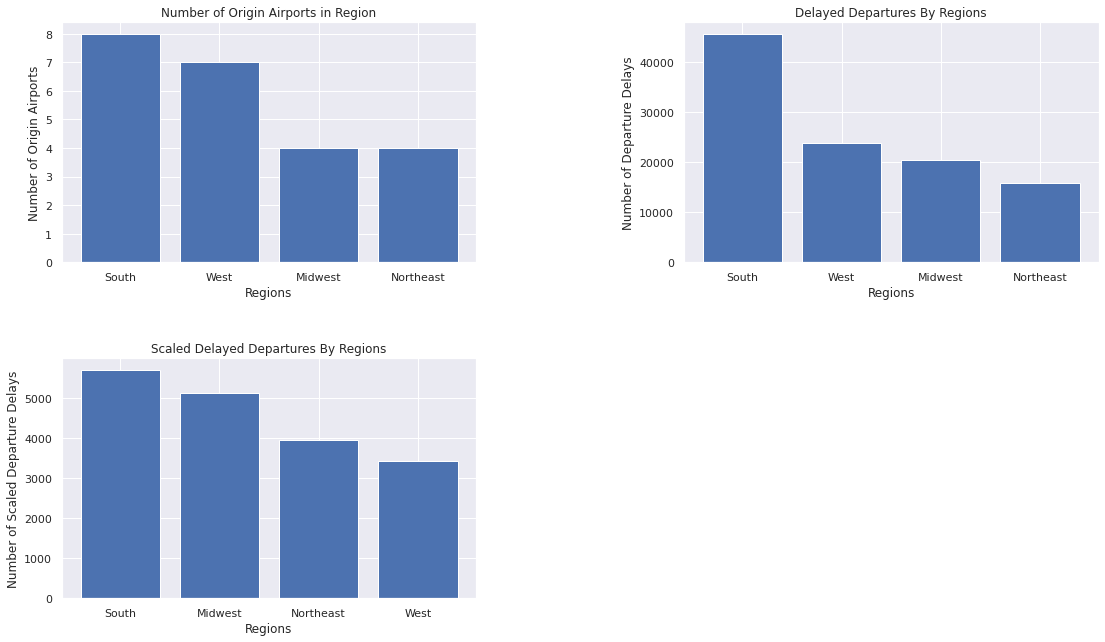

In [ ]:
plt.figure(figsize=[18,10])

plt.subplot(2,2,1)
plt.bar(airports_in_region['Origin Region'],airports_in_region['Origin Airport'])
plt.title('Number of Origin Airports in Region')
plt.xlabel("Regions")
plt.ylabel("Number of Origin Airports");

plt.subplot(2,2,2)
plt.bar(delays_by_region['Origin Region'],delays_by_region['Delayed Departure'])
plt.title('Delayed Departures By Regions')
plt.xlabel("Regions")
plt.ylabel("Number of Departure Delays");

plt.subplot(2,2,3)
plt.bar(scaled_delays_by_region['Origin Region'],scaled_delays_by_region['Scaled Delayed Departure'])
plt.title('Scaled Delayed Departures By Regions')
plt.xlabel("Regions")
plt.ylabel("Number of Scaled Departure Delays");

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

## How many monthly delays?

In [ ]:
delays_by_month = df[['Delayed Departure', 'Month']].groupby('Month').sum().reset_index()

delays_by_month

,Month,Delayed Departure
0,1,7119
1,2,8753
2,3,7637
3,4,8437
4,5,8705
5,6,12677
6,7,12696
7,8,11429
8,9,6087
9,10,7289


In [ ]:
delays_by_weekday = df[['Delayed Departure', 'Day_Of_Week']].groupby('Day_Of_Week').sum().reset_index()

delays_by_weekday

,Day_Of_Week,Delayed Departure
0,0,15953
1,1,13812
2,2,15549
3,3,18054
4,4,16905
5,5,10738
6,6,14871


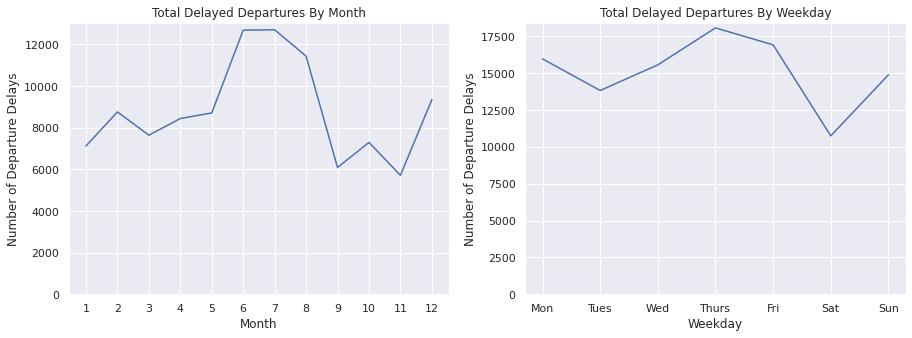

In [ ]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(delays_by_month['Month'],delays_by_month['Delayed Departure'])
plt.title('Total Delayed Departures By Month')
plt.xticks(delays_by_month['Month'])
plt.xlabel("Month")
plt.ylabel("Number of Departure Delays");
plt.ylim(ymin=0)

plt.subplot(1,2,2)
plt.plot(delays_by_weekday['Day_Of_Week'],delays_by_weekday['Delayed Departure'])
plt.title('Total Delayed Departures By Weekday')
plt.xticks(delays_by_weekday['Day_Of_Week'], labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.xlabel("Weekday")
plt.ylabel("Number of Departure Delays")
plt.ylim(ymin=0);

## What time of day are delays most likely to occur?

In [ ]:
delays_by_time = df[['Actual Departure Time Name', 'Delayed Departure']].groupby('Actual Departure Time Name').sum().reset_index().sort_values('Delayed Departure', ascending = False)

delays_by_time

,Actual Departure Time Name,Delayed Departure
2,Evening,30245
5,Night,29845
0,Afternoon,23006
4,Morning,16900
3,Late Night,3357
1,Early Morning,2529


In [ ]:
number_of_flights_by_time = df[['Actual Departure Time Name', 'Unique_Id']].groupby('Actual Departure Time Name').count().reset_index().sort_values('Unique_Id', ascending = False)

number_of_flights_by_time

,Actual Departure Time Name,Unique_Id
4,Morning,189302
0,Afternoon,164463
2,Evening,151537
5,Night,117515
1,Early Morning,75361
3,Late Night,6323


In [ ]:
scaled_delays_by_time = delays_by_time.merge(number_of_flights_by_time, how = 'left', on = 'Actual Departure Time Name')

scaled_delays_by_time['Scaled Delayed Departure'] = round(scaled_delays_by_time['Delayed Departure']/scaled_delays_by_time['Unique_Id'],2)

scaled_delays_by_time.sort_values('Scaled Delayed Departure', ascending = False, inplace = True)

scaled_delays_by_time

,Actual Departure Time Name,Delayed Departure,Unique_Id,Scaled Delayed Departure
4,Late Night,3357,6323,0.53
1,Night,29845,117515,0.25
0,Evening,30245,151537,0.20
2,Afternoon,23006,164463,0.14
3,Morning,16900,189302,0.09
5,Early Morning,2529,75361,0.03


## Does distance affect delays?

In [ ]:
delays_by_distance = df[['Distance Name', 'Delayed Departure']].groupby('Distance Name').sum().reset_index().sort_values('Distance Name', ascending = False)

delays_by_distance

,Distance Name,Delayed Departure
1,Short Haul,105786
0,Long Haul,96


In [ ]:
number_of_flights_by_distance = df[['Distance Name', 'Unique_Id']].groupby('Distance Name').count().reset_index().sort_values('Unique_Id', ascending = False)

number_of_flights_by_distance

,Distance Name,Unique_Id
1,Short Haul,703769
0,Long Haul,732


In [ ]:
scaled_delays_by_distance = delays_by_distance.merge(number_of_flights_by_distance, how = 'left', on = 'Distance Name')

scaled_delays_by_distance['Scaled Delayed Departure'] = round(scaled_delays_by_distance['Delayed Departure']/scaled_delays_by_distance['Unique_Id'],2)

scaled_delays_by_distance.sort_values('Scaled Delayed Departure', ascending = False, inplace = True)

scaled_delays_by_distance

,Distance Name,Delayed Departure,Unique_Id,Scaled Delayed Departure
0,Short Haul,105786,703769,0.15
1,Long Haul,96,732,0.13


In [ ]:
scaled_delays_by_distance2 = df[['Distance Range Name', 'Unique_Id']].groupby('Distance Range Name').count().reset_index().sort_values('Unique_Id', ascending = False).merge(
   df[['Distance Range Name', 'Delayed Departure']].groupby('Distance Range Name').sum().reset_index().sort_values('Delayed Departure', ascending = False),
   how = 'left', on ='Distance Range Name' 
)

scaled_delays_by_distance2['Scaled Delayed Departure'] = round(scaled_delays_by_distance2['Delayed Departure']/scaled_delays_by_distance2['Unique_Id'],2)

scaled_delays_by_distance2.sort_values('Scaled Delayed Departure', ascending = False, inplace = True)

scaled_delays_by_distance2


,Distance Range Name,Unique_Id,Delayed Departure,Scaled Delayed Departure
5,2539-3027,12104,2112,0.17
8,3027-3516,112,19,0.17
0,583-1072,245500,38694,0.16
2,1072-1561,93383,14488,0.16
4,2050-2539,43659,7175,0.16
3,1561-2050,71697,10762,0.15
9,4005-4494,52,8,0.15
1,90-583,237426,32555,0.14
7,3516-4005,203,27,0.13
6,4494-4983,365,42,0.12


In [ ]:
df[['Distance Range Name', 'Delayed Departure']].groupby('Distance Range Name').sum().reset_index().sort_values('Delayed Departure', ascending = False)

,Distance Range Name,Delayed Departure
1,583-1072,38694
0,90-583,32555
2,1072-1561,14488
3,1561-2050,10762
4,2050-2539,7175
5,2539-3027,2112
9,4494-4983,42
7,3516-4005,27
6,3027-3516,19
8,4005-4494,8


## When there is a delay, what impact does carrier, weather, NAS, security, and late arrival have?

In [ ]:
df[['Delayed Departure','Minutes Delayed By Carrier', 'Minutes Delayed By Weather', 'Minutes Delayed By NAS',
    'Minutes Delayed By Security', 'Minutes Delayed By Late Arrival']].groupby('Delayed Departure').sum()
# Note 0 means departing flights are not more than 15 minutes late. Seems like Delta is doing a decent job mitigating delays by NAS

,Minutes Delayed By Carrier,Minutes Delayed By Weather,Minutes Delayed By NAS,Minutes Delayed By Security,Minutes Delayed By Late Arrival
Delayed Departure,,,,,
0,57940,5460,711972,0,26736
1,2500872,507765,1444131,7491,2050198


In [ ]:
df.head()

,Unique_Id,Carrier Code,Flight Date,Flight Number,Tail Number,Origin Airport,Origin City,Origin State,Origin Divison,Origin Region,Dest Airport,Dest City,Dest State,Dest Divison,Dest Region,Scheduled Departure Time,Actual Departure Time,Actual Departure Time Name,Minutes Delayed Departing,Delayed Departure,Scheduled Elapsed Time,Actual Elapsed Time,Wheels-off Time,Taxi-out Time,Minutes Delayed By Carrier,Minutes Delayed By Weather,Minutes Delayed By NAS,Minutes Delayed By Security,Minutes Delayed By Late Arrival,Cancelled,Diverted,Flights,Distance,Distance Name,Scheduled Arrival Time,Actual Arrival Time,Minutes Delayed Arriving,AirTime,Month,Day_Of_Week,Distance Range Name
0,01/01/2019-N67171-15-ATL,DL,2019-01-01,15,N67171,ATL,Atlanta,Georgia,South Atlantic,South,TPA,Tampa,Florida,South Atlantic,South,19:51,19:48,Evening,-3,0,88,80,20:01,13,0,0,0,0,0,0.0,0.0,1.0,406.0,Short Haul,2119,2108.0,-11.0,64.0,1,1,90-583
1,01/01/2019-N354NW-31-ATL,DL,2019-01-01,31,N354NW,ATL,Atlanta,Georgia,South Atlantic,South,DFW,Dallas/Fort Worth,Texas,West South Central,South,19:14,19:17,Evening,3,0,148,139,19:31,14,0,0,0,0,0,0.0,0.0,1.0,731.0,Short Haul,2042,2036.0,-6.0,112.0,1,1,583-1072
2,01/01/2019-N960DL-91-ATL,DL,2019-01-01,91,N960DL,ATL,Atlanta,Georgia,South Atlantic,South,RSW,Fort Myers,Florida,South Atlantic,South,17:24,17:20,Evening,-4,0,101,99,17:30,10,0,0,0,0,0,0.0,0.0,1.0,515.0,Short Haul,1905,1859.0,-46.0,86.0,1,1,90-583
3,01/01/2019-N944AT-131-ATL,DL,2019-01-01,131,N944AT,ATL,Atlanta,Georgia,South Atlantic,South,GSP,Greer,South Carolina,South Atlantic,South,17:46,17:48,Evening,2,0,54,44,17:58,10,0,0,0,0,0,0.0,0.0,1.0,153.0,Short Haul,1840,1832.0,-8.0,31.0,1,1,90-583
4,01/01/2019-N173DZ-186-ATL,DL,2019-01-01,186,N173DZ,ATL,Atlanta,Georgia,South Atlantic,South,MCO,Orlando,Florida,South Atlantic,South,15:55,15:54,Afternoon,-1,0,90,83,16:10,16,0,0,0,0,0,0.0,0.0,1.0,404.0,Short Haul,1725,1717.0,-8.0,60.0,1,1,90-583


In [ ]:
df.columns

Index(['Unique_Id', 'Carrier Code', 'Flight Date', 'Flight Number',
       'Tail Number', 'Origin Airport', 'Origin City', 'Origin State',
       'Origin Divison', 'Origin Region', 'Dest Airport', 'Dest City',
       'Dest State', 'Dest Divison', 'Dest Region', 'Scheduled Departure Time',
       'Actual Departure Time', 'Actual Departure Time Name',
       'Minutes Delayed Departing', 'Delayed Departure',
       'Scheduled Elapsed Time', 'Actual Elapsed Time', 'Wheels-off Time',
       'Taxi-out Time', 'Minutes Delayed By Carrier',
       'Minutes Delayed By Weather', 'Minutes Delayed By NAS',
       'Minutes Delayed By Security', 'Minutes Delayed By Late Arrival',
       'Cancelled', 'Diverted', 'Flights', 'Distance', 'Distance Name',
       'Scheduled Arrival Time', 'Actual Arrival Time',
       'Minutes Delayed Arriving', 'AirTime', 'Month', 'Day_Of_Week',
       'Distance Range Name'],
      dtype='object')

In [ ]:
df['Minutes Delayed By Carrier'].value_counts() #monthly average delay by airport

0       646290
6         1933
7         1775
15        1767
8         1715
         ...  
1120         1
608          1
936          1
426          1
589          1
Name: Minutes Delayed By Carrier, Length: 818, dtype: int64

## What does canceled or diverted flights tell us about flight delays?

In [ ]:
df[['Delayed Departure','Cancelled', 'Diverted']].groupby('Delayed Departure').sum()

,Cancelled,Diverted
Delayed Departure,,
0,1341.0,1068.0
1,31.0,445.0


In [ ]:
df[['Cancelled', 'Diverted']].describe()

,Cancelled,Diverted
count,704501.000000,704501.000000
mean,0.001947,0.002148
std,0.044087,0.046293
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


## What does air time tell us about flight delays?

In [ ]:
df[['Delayed Departure','AirTime']].groupby('Delayed Departure').mean()

,AirTime
Delayed Departure,
0,126.951945
1,130.689335


In [ ]:
df['AirTime'].describe() #What is airtime..

count    701616.000000
mean        127.513425
std          74.914275
min          19.000000
25%          73.000000
50%         106.000000
75%         164.000000
max         651.000000
Name: AirTime, dtype: float64

## Does Wheels-off Time or Taxi_out Time relate to delayed flights?

In [ ]:
df[['Delayed Departure','AirTime']].groupby('Delayed Departure').mean()

,AirTime
Delayed Departure,
0,126.951945
1,130.689335


In [ ]:
df.columns

Index(['Unique_Id', 'Carrier Code', 'Flight Date', 'Flight Number',
       'Tail Number', 'Origin Airport', 'Origin City', 'Origin State',
       'Origin Divison', 'Origin Region', 'Dest Airport', 'Dest City',
       'Dest State', 'Dest Divison', 'Dest Region', 'Scheduled Departure Time',
       'Actual Departure Time', 'Actual Departure Time Name',
       'Minutes Delayed Departing', 'Delayed Departure',
       'Scheduled Elapsed Time', 'Actual Elapsed Time', 'Wheels-off Time',
       'Taxi-out Time', 'Minutes Delayed By Carrier',
       'Minutes Delayed By Weather', 'Minutes Delayed By NAS',
       'Minutes Delayed By Security', 'Minutes Delayed By Late Arrival',
       'Cancelled', 'Diverted', 'Flights', 'Distance', 'Distance Name',
       'Scheduled Arrival Time', 'Actual Arrival Time',
       'Minutes Delayed Arriving', 'AirTime', 'Month', 'Day_Of_Week',
       'Distance Range Name'],
      dtype='object')

In [ ]:
df[['Delayed Departure','Tail Number']].groupby('Tail Number').sum().reset_index().sort_values('Delayed Departure', ascending = False)

,Tail Number,Delayed Departure
1,N102DU,251
234,N357DN,239
4,N105DU,234
223,N353DN,222
134,N322US,222
...,...,...
393,N510DN,0
632,N852NW,0
821,N940DN,0
826,N943DN,0


In [ ]:
df[['Unique_Id','Tail Number']].groupby('Tail Number').count().reset_index().sort_values('Unique_Id', ascending = False)

,Tail Number,Unique_Id
243,N360DN,1332
252,N363DN,1315
249,N362DN,1311
174,N336DX,1311
180,N338DN,1309
...,...,...
394,N512DN,1
387,N501DN,1
386,N404DX,1
391,N507DN,1


In [ ]:
scaled_delays_by_tail = df[['Delayed Departure','Tail Number']].groupby('Tail Number').sum().reset_index().sort_values('Delayed Departure', ascending = False).merge(
  df[['Unique_Id','Tail Number']].groupby('Tail Number').count().reset_index().sort_values('Unique_Id', ascending = False),
   how = 'left', on ='Tail Number' 
)

scaled_delays_by_tail['Scaled Delayed Departure'] = round(scaled_delays_by_distance2['Delayed Departure']/scaled_delays_by_distance2['Unique_Id'],2)

scaled_delays_by_tail.sort_values('Scaled Delayed Departure', ascending = False, inplace = True)

scaled_delays_by_tail.dropna(axis=0, subset=['Scaled Delayed Departure'])['Delayed Departure'].sum()

2262